## Data Processing

In [1]:
from DWR_preprocess import *

station_number = 26850
year_regex = '2020'

In [2]:
blitzortung_array = blitzortung_preprocessing(station_number, matrix_shape=200, year_regex=year_regex)

Latitude is 53.86583, Longitude is 28.04028
Converting data from .json to pd.DataFrame


100%|██████████| 130156/130156 [13:03<00:00, 166.16it/s] 


Number of blitzortung cases is: 26765244
Array shape is: (4534, 200, 200)


In [5]:
radar_array = radar_preprocessing(station_number, 1000, year_regex=year_regex)

N of matched files is 4534
N of non-lightning cases: 1000
Converting phen


100%|██████████| 5401/5401 [02:08<00:00, 42.08it/s] 


Converting echo_top


100%|██████████| 5401/5401 [02:05<00:00, 42.92it/s] 


Converting reflectivity


100%|██████████| 5401/5401 [06:29<00:00, 13.86it/s] 


Converting properties


100%|██████████| 5401/5401 [00:08<00:00, 610.97it/s]


Converting to numpy


100%|██████████| 5401/5401 [00:04<00:00, 1094.00it/s]


Shape of radar array: (5401, 200, 200, 18)


In [6]:
stack = concatenate_data(radar_array, blitzortung_array, station_number, year_regex=year_regex)

All data converted and saved!


## Sliding Window 

In [1]:
import numpy as np
from DWR_preprocess import *
import warnings
warnings.filterwarnings("ignore")

station_number = 26850
window = 5

In [6]:
stack = np.load(Paths.interim + f'stack_{station_number}.npy')
stack = np.delete(stack, 1, axis=0)
stack.shape

(5400, 200, 200, 19)

In [7]:
factors(stack.shape[0])
#stack = np.delete(stack, (np.arange(amount_to_delete)), 0)

{1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 12,
 15,
 18,
 20,
 24,
 25,
 27,
 30,
 36,
 40,
 45,
 50,
 54,
 60,
 72,
 75,
 90,
 100,
 108,
 120,
 135,
 150,
 180,
 200,
 216,
 225,
 270,
 300,
 360,
 450,
 540,
 600,
 675,
 900,
 1080,
 1350,
 1800,
 2700,
 5400}

In [8]:
precomputing(stack, station_number, window, distribution=np.random.uniform, value=0.03)

precomputing "target"
precomputing "delta"


  0%|          | 0/180 [00:00<?, ?it/s]

success


In [9]:
np.unique(np.load(Paths.interim + "target_26850.npy"), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20], dtype=int32),
 array([207319411,    101353,     16834,      5190,      1904,       823,
              392,       189,       104,        74,        39,        27,
               19,        12,        10,         9,         4,         3,
                1,         2]))

In [10]:
%%time
window_data_filter(stack, split_value=1080, window=5, station_number=26850)

Iteration: 0
Iteration data is 
 dask.array<reshape, shape=(41489280, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(41481001,), true-(8279,)


  0%|          | 0/36 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

TF processed 
 : false-(574257,), true-(8007,)
Iteration result is 
 dask.array<concatenate, shape=(582264, 5, 5, 19), dtype=int32, chunksize=(27882, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/70 [00:00<?, ?it/s]

Iteration: 1
Iteration data is 
 dask.array<reshape, shape=(41489280, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(41439690,), true-(49590,)


  0%|          | 0/36 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

TF processed 
 : false-(315746,), true-(49079,)
Iteration result is 
 dask.array<concatenate, shape=(364825, 5, 5, 19), dtype=int32, chunksize=(17341, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/72 [00:00<?, ?it/s]

Iteration: 2
Iteration data is 
 dask.array<reshape, shape=(41489280, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(41454296,), true-(34984,)


  0%|          | 0/36 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

TF processed 
 : false-(412025,), true-(33959,)
Iteration result is 
 dask.array<concatenate, shape=(445984, 5, 5, 19), dtype=int32, chunksize=(23630, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/71 [00:00<?, ?it/s]

Iteration: 3
Iteration data is 
 dask.array<reshape, shape=(41489280, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(41469161,), true-(20119,)


  0%|          | 0/36 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

TF processed 
 : false-(386922,), true-(19635,)
Iteration result is 
 dask.array<concatenate, shape=(406557, 5, 5, 19), dtype=int32, chunksize=(23368, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/71 [00:00<?, ?it/s]

Iteration: 4
Iteration data is 
 dask.array<reshape, shape=(41489280, 5, 5, 19), dtype=int32, chunksize=(1152480, 5, 5, 19), chunktype=numpy.ndarray>
TF: false-(41475263,), true-(14017,)


  0%|          | 0/36 [00:00<?, ?it/s]

Remaining percent  = 3.0


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

TF processed 
 : false-(615396,), true-(13749,)
Iteration result is 
 dask.array<concatenate, shape=(629145, 5, 5, 19), dtype=int32, chunksize=(27733, 5, 5, 19), chunktype=numpy.ndarray>


  0%|          | 0/62 [00:00<?, ?it/s]

CPU times: user 14min 37s, sys: 20min 22s, total: 34min 59s
Wall time: 21min 23s


## Machine Learning preprocessing

In [11]:
from DWR_preprocess import *

window_shape = 5
station_number = 26850

In [13]:
df = from_windows_to_df(Paths.data + f'lightning_stack_{station_number}', 5, station_number)

100%|██████████| 346/346 [00:01<00:00, 305.39it/s]


In [16]:
np.unique(df.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20], dtype=int32),
 array([2304346,   99045,   16653,    5138,    1889,     820,     392,
            188,     104,      74,      39,      27,      19,      12,
             10,       9,       4,       3,       1,       2]))

## Filtering data

In [1]:
from DWR_preprocess import *

window_shape = 5
station_number = 26850

In [146]:
df = true_data_filter(Paths.interim + f'{station_number}_Convective_cloud_windows_data.parquet',station_number)

Before: 0 - (2304346,), 1 - (124429,)
After:  0 - (2095204,), 1 - (108369,)


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import torch
from DWR_preprocess import *
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

station_number = 26850
window = 5

In [148]:
df_filter = df.filter(regex='max|target|param|delta')
df_filter.columns

Index(['target', 'Hmax', 'Zmax', 'delta_iso22', 'Zmax_layer_1', 'Zmax_layer_2',
       'Zmax_layer_3', 'Zmax_layer_4', 'Zmax_layer_5', 'Zmax_layer_6',
       'Zmax_layer_7', 'Zmax_layer_8', 'Zmax_layer_9', 'Zmax_layer_10',
       'Zmax_layer_11', 'y_param', 'H_Zmax'],
      dtype='object')

In [149]:
X = df_filter.loc[:, df_filter.columns != 'target']
y = df_filter.loc[:, 'target']
y = np.where(y>=1,1,0)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

Accuracy is 0.9662
f1_score is 0.5819
precision_score is 0.4801
recall_score is 0.7384
roc_auc_score is 0.7357
HSS is 0.5651
ETS is 0.3938
CSI is 0.4103
sedi is 0.8757
CPU times: user 3.27 s, sys: 4.08 ms, total: 3.27 s
Wall time: 3.27 s


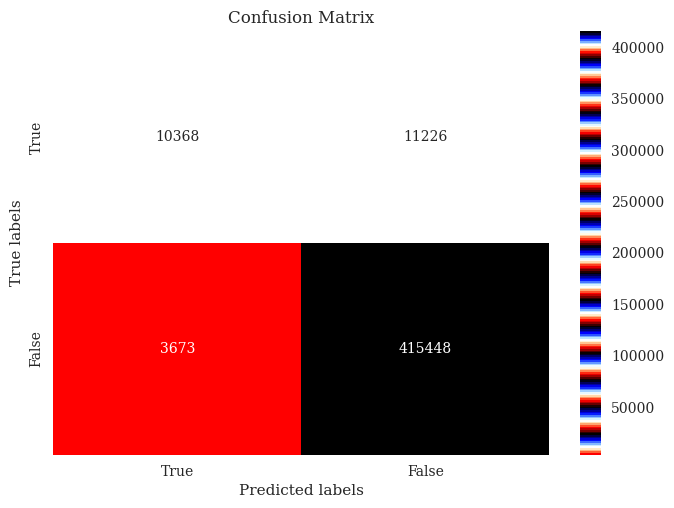

In [90]:
%%time
#classificator 
sgd = SGDClassifier(loss="log_loss", n_jobs = -1, random_state=42) 
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)


# get scores
sgd_res = scorer(y_test, sgd_pred)

In [114]:
feat_df = pd.DataFrame({'feature':X.columns[sorted_idx],'coef':np.abs(sgd.coef_.reshape(16)[sorted_idx])})
best_features = list(feat_df.sort_values('coef', ascending=False).feature[:5])

In [115]:
sgd.coef_, sgd.intercept_

(array([[-1.24967036,  0.32327964,  1.40748645,  0.05120694, -0.05061402,
          0.00940444, -0.00492467,  0.88764246,  1.84841903,  0.97554946,
          0.34245044,  0.00215042,  0.1266373 ,  0.11550033,  0.2557315 ,
          0.0048341 ]]),
 array([-6.76680811]))

Text(0.5, 0, 'Linear Regression Coef')

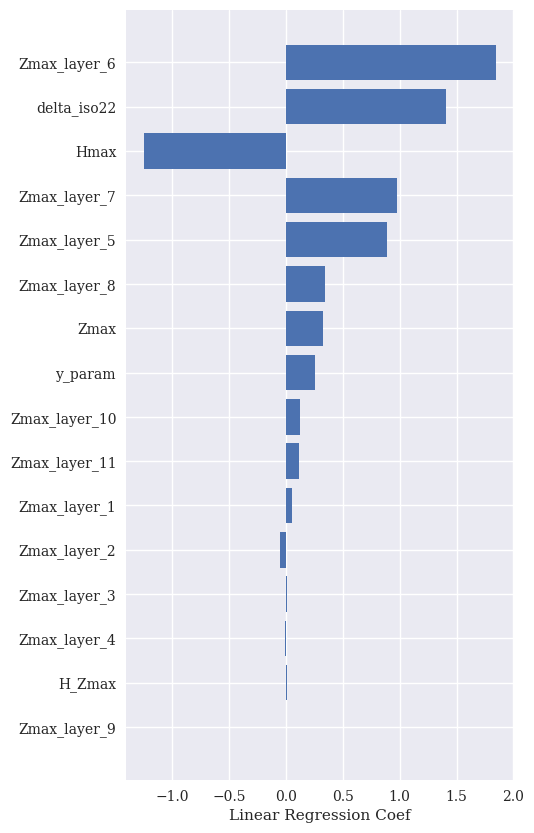

In [19]:
plt.figure(figsize=(5,10))
sorted_idx = np.abs(sgd.coef_).reshape(16).argsort()
plt.barh(X.columns[sorted_idx], sgd.coef_.reshape(16)[sorted_idx])
plt.xlabel("Linear Regression Coef")

Accuracy is 0.9731
f1_score is 0.7122
precision_score is 0.6792
recall_score is 0.7486
roc_auc_score is 0.8337
HSS is 0.6981
ETS is 0.5363
CSI is 0.553
sedi is 0.8943
CPU times: user 20min 35s, sys: 5.01 s, total: 20min 40s
Wall time: 2min 1s


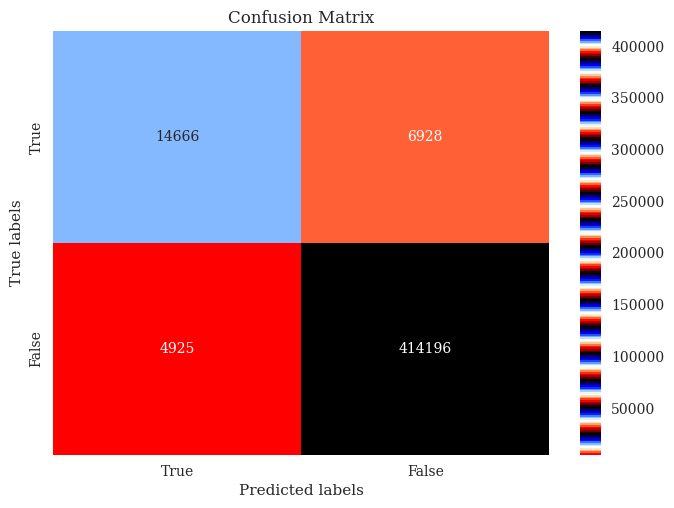

In [76]:
%%time
#classificator 
rf = RandomForestClassifier(n_jobs = -2) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# get scores
rf_res = scorer(y_test, rf_pred)

Text(0.5, 0, 'Random Forest Feature Importance')

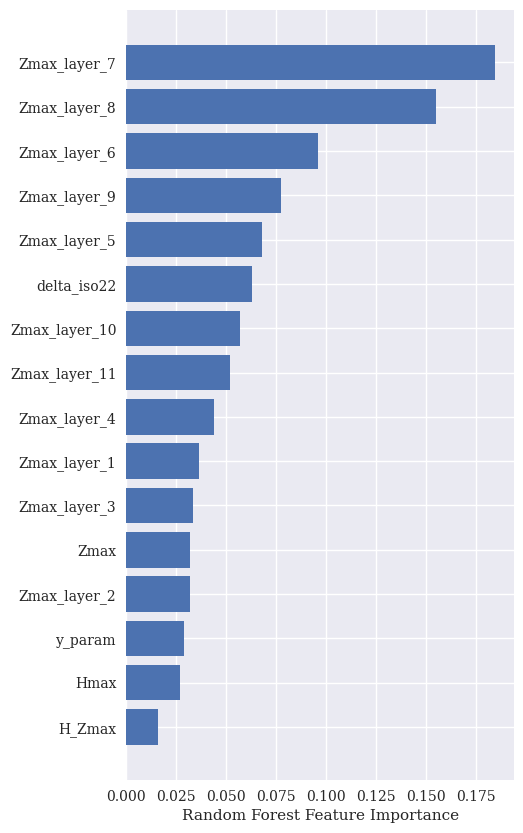

In [89]:
plt.figure(figsize=(5,10))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### feature set 0

In [122]:
features_set_0 = ['Hmax', 'Zmax', 'H_Zmax', 'delta_iso22', 'y_param','Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [123]:
X.columns

Index(['Hmax', 'Zmax', 'delta_iso22', 'Zmax_layer_1', 'Zmax_layer_2',
       'Zmax_layer_3', 'Zmax_layer_4', 'Zmax_layer_5', 'Zmax_layer_6',
       'Zmax_layer_7', 'Zmax_layer_8', 'Zmax_layer_9', 'Zmax_layer_10',
       'Zmax_layer_11', 'y_param', 'H_Zmax'],
      dtype='object')

In [124]:
feature_indices_0 = []
for feature in features_set_0:
    feature_indices_0.append(np.argwhere(np.array(X.columns) == feature))
feature_indices_0 = np.array(feature_indices_0).reshape(np.array(feature_indices_0).shape[0])
feature_indices_0


array([ 0,  1, 15,  2, 14,  8,  9, 10, 11, 12])

In [125]:
X_train_set_0 = X_train[:, feature_indices_0]
X_test_set_0 = X_test[:, feature_indices_0]

Accuracy is 0.9678
f1_score is 0.632
precision_score is 0.5652
recall_score is 0.7168
roc_auc_score is 0.7768
HSS is 0.6154
ETS is 0.4445
CSI is 0.462
sedi is 0.869
CPU times: user 12.6 s, sys: 52.1 ms, total: 12.7 s
Wall time: 12.7 s


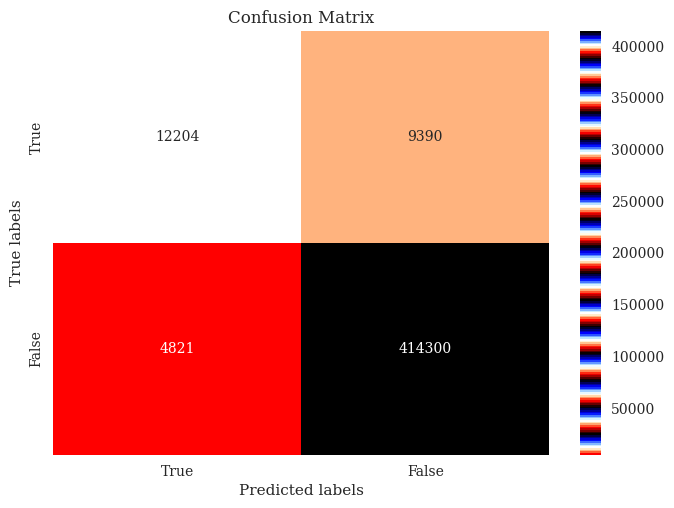

In [126]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train_set_0, y_train)
sgd_pred_0 = sgd.predict(X_test_set_0)


# get scores
sgd_res = scorer(y_test, sgd_pred_0)

In [127]:
coef_set_0 = sgd.coef_.tolist()[0]
inter_set_0 = sgd.intercept_.tolist()[0]

In [128]:
coef_set_0, inter_set_0

([-1.4594827779422352,
  0.3038427733259509,
  -0.025024611716539403,
  1.7895984359913326,
  0.20528146861255284,
  3.607158324022024,
  0.426577777982917,
  0.31166985925677027,
  0.017550715701096165,
  0.2528106437870482],
 -6.858261682081707)

### feature set 1


In [63]:
features_set_1 = ['Hmax', 'Zmax', 'Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [64]:
feature_indices_1 = []
for feature in features_set_1:
    feature_indices_1.append(np.argwhere(np.array(X.columns) == feature))
feature_indices_1 = np.array(feature_indices_1).reshape(np.array(feature_indices_1).shape[0])
feature_indices_1

array([ 0,  1,  8,  9, 10, 11, 12])

In [65]:
X_train_set_1 = X_train[:, feature_indices_1]
X_test_set_1 = X_test[:, feature_indices_1]

Accuracy is 0.9674
f1_score is 0.626
precision_score is 0.5565
recall_score is 0.7153
roc_auc_score is 0.7725
HSS is 0.6092
ETS is 0.438
CSI is 0.4556
sedi is 0.8675
CPU times: user 11.3 s, sys: 13.1 ms, total: 11.3 s
Wall time: 11.3 s


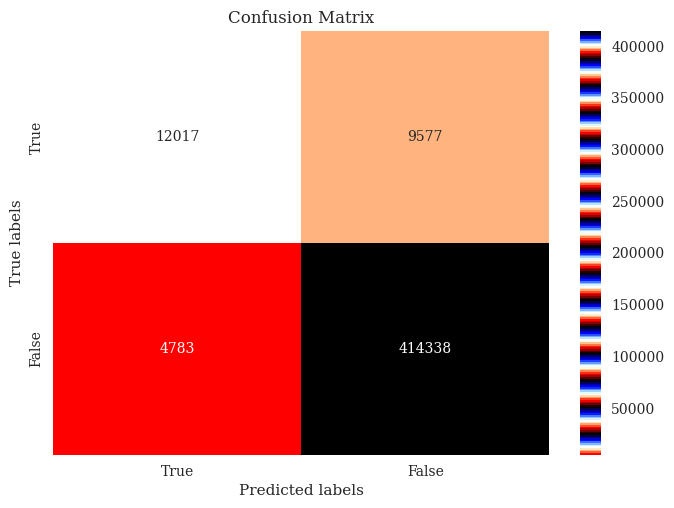

In [66]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train_set_1, y_train)
sgd_pred_1 = sgd.predict(X_test_set_1)


# get scores
sgd_res = scorer(y_test, sgd_pred_1)

In [67]:
coef_set_1 = sgd.coef_.tolist()[0]
inter_set_1 = sgd.intercept_.tolist()[0]
coef_set_1, inter_set_1

([0.5220189466853136,
  0.3377176035847147,
  3.560569627037875,
  0.6449981238438588,
  0.2341070674058443,
  -0.06187678202646707,
  0.17414138353595862],
 -6.853331074126327)

### feature set 2


In [68]:
features_set_2 = ['Hmax', 'Zmax', 'H_Zmax','Zmax_layer_6', 'Zmax_layer_7', 'Zmax_layer_8',
       'Zmax_layer_9', 'Zmax_layer_10']

In [69]:
feature_indices_2 = []
for feature in features_set_2:
    feature_indices_2.append(np.argwhere(np.array(X.columns) == feature))
feature_indices_2 = np.array(feature_indices_2).reshape(np.array(feature_indices_2).shape[0])
feature_indices_2


array([ 0,  1, 15,  8,  9, 10, 11, 12])

In [70]:
X_train_set_2 = X_train[:, feature_indices_2]
X_test_set_2 = X_test[:, feature_indices_2]

Accuracy is 0.9675
f1_score is 0.6268
precision_score is 0.5573
recall_score is 0.7161
roc_auc_score is 0.773
HSS is 0.6101
ETS is 0.4389
CSI is 0.4564
sedi is 0.8681
CPU times: user 10.6 s, sys: 25.1 ms, total: 10.7 s
Wall time: 10.7 s


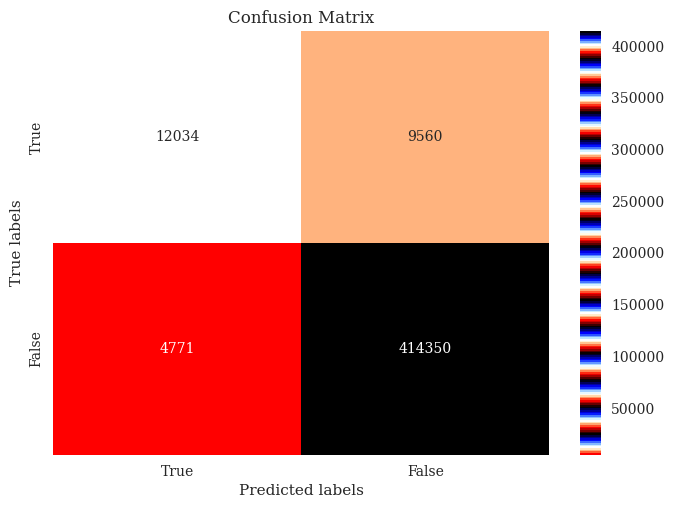

In [71]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train_set_2, y_train)
sgd_pred_2 = sgd.predict(X_test_set_2)


# get scores
sgd_res = scorer(y_test, sgd_pred_2)

In [72]:
coef_set_2 = sgd.coef_.tolist()[0]
inter_set_2 = sgd.intercept_.tolist()[0]
coef_set_2, inter_set_2

([0.5306182839979463,
  0.2891731844368553,
  -0.04342169255620947,
  3.6253875723382154,
  0.6876408783001258,
  0.2350264290893089,
  -0.06199361383474736,
  0.17136197174108023],
 -6.880728067655704)

### feature set X

In [113]:
best_features

[]

In [116]:
best_indices = []
for feature in best_features:
    best_indices.append(np.argwhere(np.array(X.columns) == feature))
best_indices = np.array(best_indices).reshape(np.array(best_indices).shape[0])
best_indices

array([8, 2, 0, 9, 7])

In [117]:
X_train_best = X_train[:, best_indices]
X_test_best = X_test[:, best_indices]

Accuracy is 0.9677
f1_score is 0.6313
precision_score is 0.5637
recall_score is 0.7174
roc_auc_score is 0.7761
HSS is 0.6147
ETS is 0.4437
CSI is 0.4613
sedi is 0.8692
CPU times: user 10.9 s, sys: 20.2 ms, total: 10.9 s
Wall time: 10.9 s


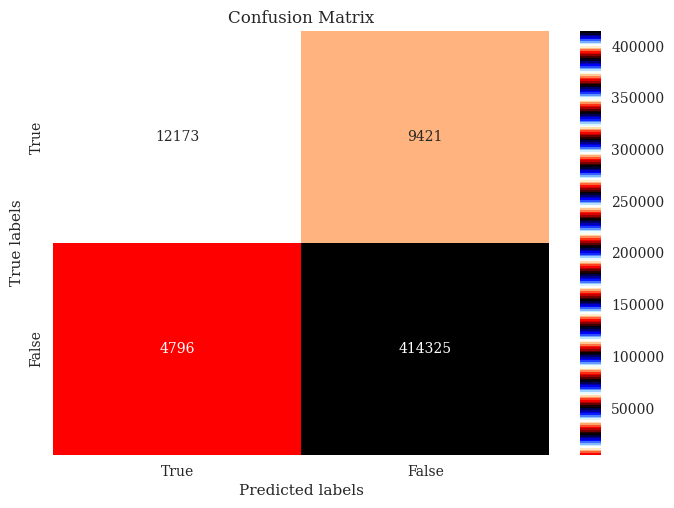

In [118]:
%%time
#classificator 
sgd = LogisticRegression(solver="saga", n_jobs = -1, random_state=42) 
sgd.fit(X_train_best, y_train)
sgd_pred_best = sgd.predict(X_test_best)


# get scores
sgd_res = scorer(y_test, sgd_pred_best)

In [121]:
best_features

['Zmax_layer_6', 'delta_iso22', 'Hmax', 'Zmax_layer_7', 'Zmax_layer_5']

In [120]:
coef_set_best = sgd.coef_.tolist()[0]
inter_set_best = sgd.intercept_.tolist()[0]
coef_set_best, inter_set_best

([3.160543534084005,
  1.6870320598580848,
  -1.0403047725177343,
  0.9530215860754212,
  1.0434140635450233],
 -6.921818874698915)

In [150]:
X_test_reversed = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)
X_test_reversed

,Hmax,Zmax,delta_iso22,Zmax_layer_1,Zmax_layer_2,Zmax_layer_3,Zmax_layer_4,Zmax_layer_5,Zmax_layer_6,Zmax_layer_7,Zmax_layer_8,Zmax_layer_9,Zmax_layer_10,Zmax_layer_11,y_param,H_Zmax
0,9250.0,32.0,2177.0,24.0,27.0,30.0,32.0,26.0,16.0,10.0,5.0,1.0,-3.0,-100.0,25.0,4.0
1,9250.0,22.0,2296.0,18.0,20.0,22.0,22.0,19.0,16.0,11.0,7.0,3.0,-1.0,-100.0,27.0,3.0
2,4750.0,9.0,27.0,9.0,9.0,9.0,9.0,5.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,10.0,1.0
3,9500.0,30.0,3505.0,24.0,27.0,30.0,25.0,16.0,14.0,10.0,6.0,2.0,-2.0,-100.0,30.0,3.0
4,5750.0,21.0,-949.0,-100.0,-100.0,-100.0,19.0,20.0,21.0,-100.0,-100.0,-100.0,-100.0,-100.0,17.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440710,5500.0,28.0,12.0,20.0,25.0,28.0,15.0,0.0,-4.0,-100.0,-100.0,-100.0,-100.0,-100.0,14.0,3.0
440711,3500.0,19.0,-3387.0,15.0,15.0,16.0,19.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,4.0
440712,8500.0,9.0,1531.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,9.0,9.0,7.0,-100.0,-100.0,0.0,7.0
440713,8250.0,11.0,2565.0,9.0,9.0,9.0,10.0,11.0,9.0,5.0,1.0,-3.0,-100.0,-100.0,18.0,5.0


In [156]:
X_test_set_0 = X.iloc[:, feature_indices_0]
X_test_set_0

,Hmax,Zmax,H_Zmax,delta_iso22,y_param,Zmax_layer_6,Zmax_layer_7,Zmax_layer_8,Zmax_layer_9,Zmax_layer_10
8,10750,33,4,3871,37,29,25,20,15,11
9,10750,31,3,3871,36,29,25,18,13,9
10,10750,33,4,3871,37,28,24,20,16,12
11,10500,35,1,3621,37,33,28,23,19,15
12,10750,39,1,3871,39,36,30,24,19,15
...,...,...,...,...,...,...,...,...,...,...
294870,4500,18,1,-2602,10,-100,-100,-100,-100,-100
260062,4750,14,3,-2190,11,-100,-100,-100,-100,-100
1268723,4000,-5,5,-3135,0,-100,-100,-100,-100,-100
122358,8000,3,8,1113,0,1,1,3,2,-100


In [157]:
means_set_0 = np.array([ 5.98662914e+03,  1.78991575e+01,  3.14036697e+00, -2.06321075e+02,
         1.36515097e+01, -2.33044556e+01, -4.81705255e+01, -7.04111569e+01,
        -8.30101943e+01, -8.93225769e+01])
vars_set_0 = np.array([4.33835841e+06, 1.09650570e+02, 2.97509535e+00, 3.76658406e+06,
        9.69965597e+01, 2.84090042e+03, 3.19889549e+03, 2.53062474e+03,
        1.70629585e+03, 1.15425153e+03])

In [158]:
coef_set_0 = [-0.639243663937659,
  0.8551190949277104,
  0.245417349603466,
  1.5591457486408773,
  -0.12700607806288347,
  0.5169288478384069,
  0.4678676340456219,
  0.2950420877671173,
  0.18817580602393275,
  0.09371182694775773]
inter_set_0 = -6.725828009609889

Accuracy is 0.9566
f1_score is 0.6502
precision_score is 0.8197
recall_score is 0.5388
roc_auc_score is 0.8917
HSS is 0.6281
ETS is 0.4579
CSI is 0.4817
sedi is 0.7924


0    0.956625
1    0.650190
2    0.819662
3    0.538790
4    0.891686
5    0.628120
6    0.457853
7    0.481690
8    0.792356
dtype: float64

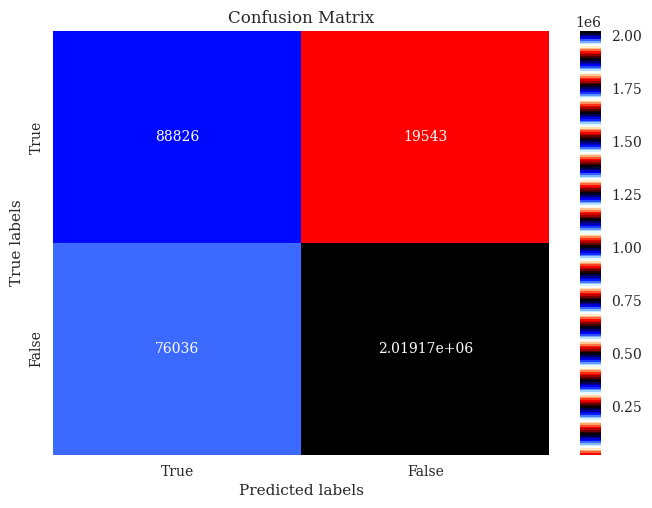

In [160]:
scaled_df = (np.subtract(X_test_set_0,means_set_0))/np.sqrt(vars_set_0)
dot_prod = np.dot(scaled_df, coef_set_0)+inter_set_0
res_preds_0 = np.where(dot_prod >= 0, 1,0)
scorer(y, res_preds_0)

### get coefs

In [133]:
means[feature_indices_0], vars[feature_indices_0]

(array([ 8.33179330e+03,  2.41869337e+01,  3.35110477e+00,  1.91723360e+03,
         2.27546494e+01,  7.64304064e+00, -2.50841883e+00, -1.81673450e+01,
        -3.95604094e+01, -5.86931275e+01]),
 array([6.11829165e+06, 1.91041161e+02, 3.14338962e+00, 5.12933410e+06,
        1.54771159e+02, 1.14374303e+03, 1.74410089e+03, 2.56571620e+03,
        3.14130236e+03, 2.95329772e+03]))

In [73]:
[f'(({features_set_0[i]} + {-means_set_0[i]}) / {np.sqrt(vars_set_0[i])})*{coef_set_0[i]}' for i in range(len(coef_set_0))],inter_set_0


(['((Hmax + -8331.793296614182) / 2473.518071000451)*-1.4594827779422352',
  '((Zmax + -24.18693367544438) / 13.82176402764326)*0.3038427733259509',
  '((H_Zmax + -3.3511047739285242) / 1.7729606943110328)*-0.025024611716539403',
  '((delta_iso22 + -1917.233601972796) / 2264.8033238624084)*1.7895984359913326',
  '((y_param + -22.75464938080109) / 12.440705737188077)*0.20528146861255284',
  '((Zmax_layer_6 + -7.643040643536656) / 33.81927007791456)*3.607158324022024',
  '((Zmax_layer_7 + 2.5084188270595074) / 41.76243390571039)*0.426577777982917',
  '((Zmax_layer_8 + 18.16734503463239) / 50.652899178363974)*0.31166985925677027',
  '((Zmax_layer_9 + 39.56040938965943) / 56.04732248263812)*0.017550715701096165',
  '((Zmax_layer_10 + 58.693127479779434) / 54.34425191295293)*0.2528106437870482'],
 -6.858261682081707)

In [74]:
[f'(({features_set_1[i]} + {-means_set_1[i]}) / {np.sqrt(vars_set_1[i])})*{coef_set_1[i]}' for i in range(len(coef_set_1))],inter_set_1

(['((Hmax + -8331.793296614182) / 2473.518071000451)*0.5220189466853136',
  '((Zmax + -24.18693367544438) / 13.82176402764326)*0.3377176035847147',
  '((Zmax_layer_6 + -7.643040643536656) / 33.81927007791456)*3.560569627037875',
  '((Zmax_layer_7 + 2.5084188270595074) / 41.76243390571039)*0.6449981238438588',
  '((Zmax_layer_8 + 18.16734503463239) / 50.652899178363974)*0.2341070674058443',
  '((Zmax_layer_9 + 39.56040938965943) / 56.04732248263812)*-0.06187678202646707',
  '((Zmax_layer_10 + 58.693127479779434) / 54.34425191295293)*0.17414138353595862'],
 -6.853331074126327)

In [75]:
[f'(({features_set_2[i]} + {-means_set_2[i]}) / {np.sqrt(vars_set_2[i])})*{coef_set_2[i]}' for i in range(len(coef_set_2))],inter_set_2

(['((Hmax + -8331.793296614182) / 2473.518071000451)*0.5306182839979463',
  '((Zmax + -24.18693367544438) / 13.82176402764326)*0.2891731844368553',
  '((H_Zmax + -3.3511047739285242) / 1.7729606943110328)*-0.04342169255620947',
  '((Zmax_layer_6 + -7.643040643536656) / 33.81927007791456)*3.6253875723382154',
  '((Zmax_layer_7 + 2.5084188270595074) / 41.76243390571039)*0.6876408783001258',
  '((Zmax_layer_8 + 18.16734503463239) / 50.652899178363974)*0.2350264290893089',
  '((Zmax_layer_9 + 39.56040938965943) / 56.04732248263812)*-0.06199361383474736',
  '((Zmax_layer_10 + 58.693127479779434) / 54.34425191295293)*0.17136197174108023'],
 -6.880728067655704)

In [ ]:
                                               # Уравнение для третьего варианта

In [ ]:
                                                  


x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693)*0.9899131219859455,               # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416)*0.75400260700572,                  # Максимальная отражаемость, dbZ
x2 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964)*0.3154611817917923,        # Отражаемость на уровне 6 км, dbZ 
x3 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273)*0.3147828342782613,          # Отражаемость на уровне 7 км, dbZ 
x4 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699)*0.2581372686875461,          # Отражаемость на уровне 8 км, dbZ 
x5 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742)*0.16879107285345113,         # Отражаемость на уровне 9 км, dbZ 
x6 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608)*0.09261709566768207         # Отражаемость на уровне 10 км, dbZ 
result = sum(xi) - 4.922595547112332                                                       # Уравнение для первого варианта


x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693) * 0.8061940405488975,             # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416) * 0.92157806119421,                # Максимальная отражаемость, dbZ
x2 = ((H_Zmax + -3.1741566904376977) / 1.7496742083261316) * 0.297247741290093,            # Уровень максимальной отражаемости, km
x3 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964) * 0.39599442698504855,     # Отражаемость на уровне 6 км, dbZ
x4 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273) * 0.2587855889239227,        # Отражаемость на уровне 7 км, dbZ
x5 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699) * 0.24677932074219924,       # Отражаемость на уровне 8 км, dbZ
x6 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742) * 0.17081076184334903,       # Отражаемость на уровне 9 км, dbZ
x7 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608) * 0.08962434980927239       # Отражаемость на уровне 10 км , dbZ
result = sum(xi) - 4.959611610720029                                                       # Уравнение для второго варианта

x0 = ((Hmax + -6030.0154726600085) / 2115.9922844899693) * -0.6402480239966041,            # Максимальная высота радиоэха, m
x1 = ((Zmax + -17.94573080216485) / 10.416867445191416) * 0.8974503789334118,              # Максимальная отражаемость, dbZ
x2 = ((H_Zmax + -3.1741566904376977) / 1.7496742083261316) * 0.29239410289074713,          # Уровень максимальной отражаемости, km
x3 = ((delta_iso22 + 178.4893927146253) / 1969.9346958566946) * 1.5515382541144216,        # Разница Максимальной высоты радиоэха и Высоты изотермы -22°C, m
x4 = ((y_param + -13.854570220419282) / 10.002661172354728) * -0.06722576052210379,        # Параметр Y
x5 = ((Zmax_layer_6 + 22.592478072133012) / 53.301569061973964) * 0.40541207975864435,     # Отражаемость на уровне 6 км, dbZ
x6 = ((Zmax_layer_7 + 47.45566322499165) / 56.83951905771273) * 0.3554628604022989,        # Отражаемость на уровне 7 км, dbZ
x7 = ((Zmax_layer_8 + 69.32080560321884) / 51.05159453896699) * 0.2903414293829566,        # Отражаемость на уровне 8 км, dbZ
x8 = ((Zmax_layer_9 + 82.09938249870234) / 42.29854135926742) * 0.1589323452929145,        # Отражаемость на уровне 9 км, dbZ
x9 = ((Zmax_layer_10 + 88.58071157705417) / 35.06562540138608) * 0.08882231885804244       # Отражаемость на уровне 10 км , dbZ
result = sum(xi) - 5.054243724161584                                                       # Уравнение для третьего варианта

# Если result > 0 - гроза есть,
#      result < 0 - грозы нет

Accuracy is 1.0
f1_score is 1.0
precision_score is 1.0
recall_score is 1.0
roc_auc_score is 1.0
HSS is 1.0
ETS is 1.0
CSI is 1.0
sedi is nan


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
dtype: float64

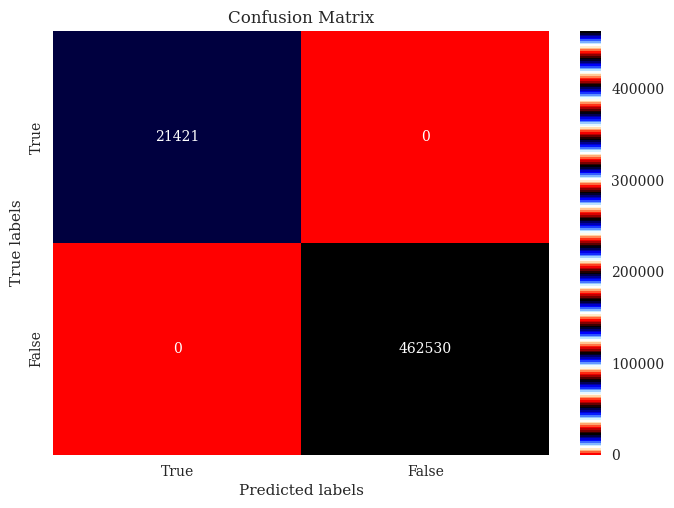

In [177]:
scaled_df = (np.subtract(X_test_reversed_scaled_0,means_set_0))/np.sqrt(vars_set_0)
dot_prod = np.dot(scaled_df, coef_set_0)+inter_set_0
res_preds_0 = np.where(dot_prod >= 0, 1,0)
scorer(sgd_pred_0, res_preds_0)

Accuracy is 1.0
f1_score is 1.0
precision_score is 1.0
recall_score is 1.0
roc_auc_score is 1.0
HSS is 1.0
ETS is 1.0
CSI is 1.0
sedi is nan


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
dtype: float64

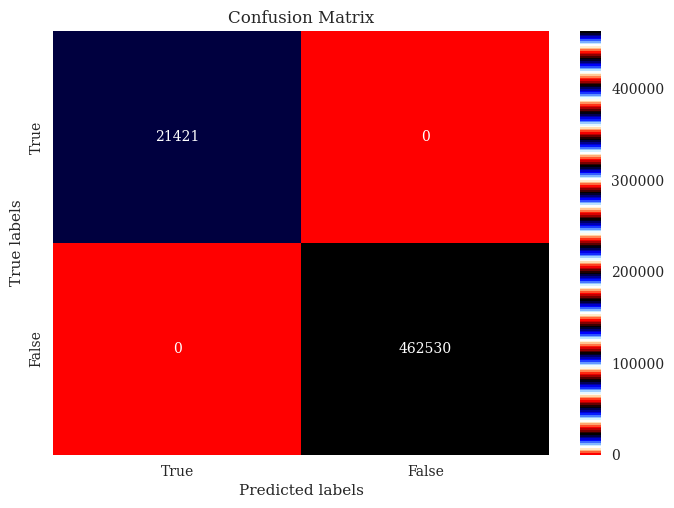

In [136]:
result = np.dot(X_test_set_0, coef_set_0)+inter_set_0
preds = np.where(result >= 0, 1,0)
scorer(sgd_pred_0, preds)

Accuracy is 0.9751
f1_score is 0.6357
precision_score is 0.6691
recall_score is 0.6054
roc_auc_score is 0.8272
HSS is 0.6228
ETS is 0.4523
CSI is 0.4659
sedi is 0.8273
CPU times: user 1min 52s, sys: 228 ms, total: 1min 52s
Wall time: 22.6 s


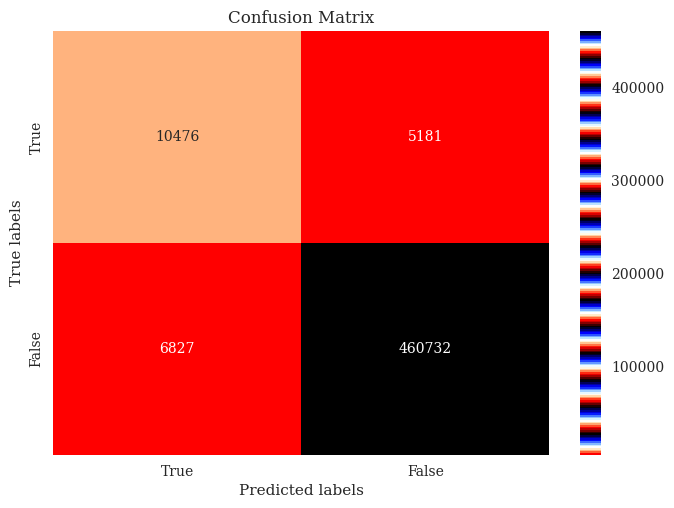

In [15]:
%%time
#classificator 
knn = KNeighborsClassifier(n_neighbors=9,leaf_size=5, n_jobs = -2) 
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# get scores
knn_res = scorer(y_test, knn_pred)

In [16]:
from catboost import CatBoostClassifier

Accuracy is 0.9766
f1_score is 0.6484
precision_score is 0.6672
recall_score is 0.6306
roc_auc_score is 0.827
HSS is 0.6363
ETS is 0.4666
CSI is 0.4797
sedi is 0.8416
CPU times: user 14min 23s, sys: 18.9 s, total: 14min 42s
Wall time: 1min 43s


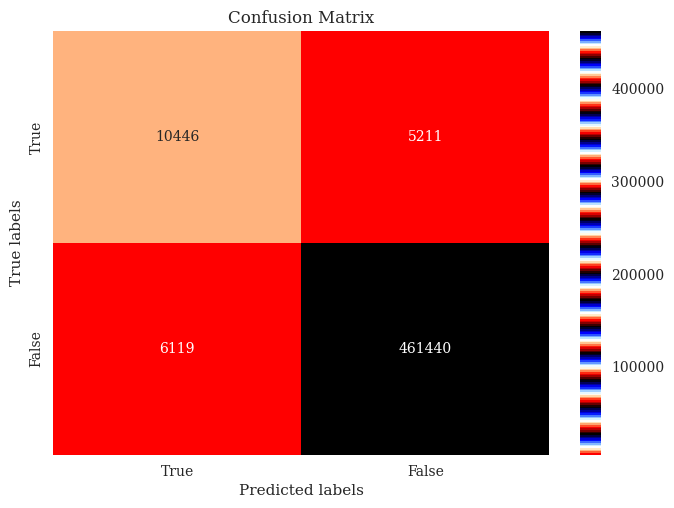

In [17]:
%%time
#classificator 
catbc = CatBoostClassifier(verbose=0) 
catbc.fit(X_train, y_train)
catbc_pred = catbc.predict(X_test)

# get scores
catbc_res = scorer(y_test, catbc_pred)

Accuracy is 0.999
f1_score is 0.1721
precision_score is 0.2015
recall_score is 0.1503
roc_auc_score is 0.6004
HSS is 0.1716
ETS is 0.0939
CSI is 0.0942
sedi is 0.6135


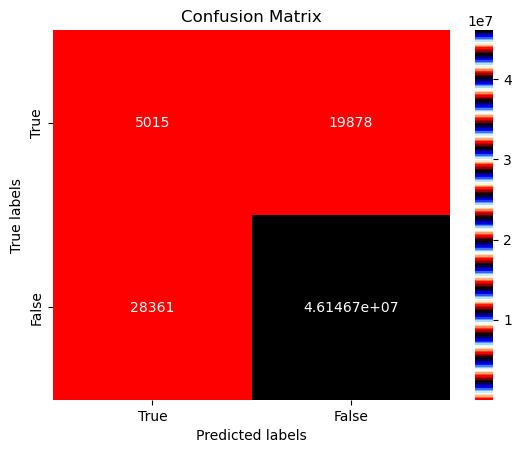

In [2]:
stack = np.load(Paths.interim + f'stack_{station_number}.npy')
stack = np.delete(stack, (1,2), 0)
phen = stack[0:1155,:,:,12]
phen[phen != 26] = 0
phen[phen == 26] = 1
Y_res = scorer(stack[0:1155,:,:,-1].flatten(), phen.flatten())

In [14]:
metrics = pd.Series(['acc', 'f1', 'pre', 'rec', 'roc_auc', 'hss', 'ets', 'csi', 'sedi'])
df = pd.concat([Y_res, sgd_res, knn_res, catbc_res, rf_res, metrics],
               axis=1,
               keys=['Y_param', "SGDClassifier", 'KNeighborsClassifier', 'CatBoostClassifier','RandomForestClassifier', 'metrics']).set_index('metrics')
df.T

metrics,acc,f1,pre,rec,roc_auc,hss,ets,csi,sedi
Y_param,0.999308,0.136207,0.160910,0.118080,0.580251,0.135869,0.072886,0.073081,0.590143
SGDClassifier,0.976412,0.620768,0.596602,0.646973,0.792858,0.608616,0.437418,0.450082,0.845137
KNeighborsClassifier,0.976135,0.653857,0.696557,0.616089,0.841021,0.641546,0.472262,0.485726,0.836171
CatBoostClassifier,0.978000,0.668328,0.684997,0.652452,0.836398,0.656958,0.489157,0.501872,0.855234
RandomForestClassifier,0.980525,0.684142,0.651785,0.719879,0.821652,0.674120,0.508432,0.519921,0.887839


In [ ]:
metrics = pd.Series(['acc', 'f1', 'pre', 'rec', 'roc_auc', 'hss', 'ets', 'csi', 'sedi'])
df = pd.concat([Y_res, sgd_res, knn_res, catbc_res, rf_res, metrics],
               axis=1,
               keys=['Y_param', "SGDClassifier", 'KNeighborsClassifier', 'CatBoostClassifier','RandomForestClassifier', 'metrics']).set_index('metrics')
df.T

metrics,acc,f1,pre,rec,roc_auc,hss,ets,csi,sedi
Y_param,0.999308,0.136207,0.160910,0.118080,0.580251,0.135869,0.072886,0.073081,0.590143
SGDClassifier,0.974953,0.627989,0.653318,0.604551,0.819514,0.615050,0.444095,0.457714,0.825357
KNeighborsClassifier,0.975759,0.645339,0.681548,0.612783,0.833573,0.632826,0.462872,0.476384,0.832828
CatBoostClassifier,0.977371,0.658367,0.673820,0.643607,0.830671,0.646671,0.477838,0.490720,0.849451
RandomForestClassifier,0.979362,0.672461,0.654723,0.691187,0.822470,0.661815,0.494561,0.506547,0.873424
